# Quiz 1

You will have to rename the quiz Jupyter notebook file as lastname_firstname and upload to Canvas in the correct ipynb format within the 45 minute testing period. 

You may consult your notes, lecture material, or discussion section material. You must NOT consult any other sources. You should NOT seek help from anyone else for the duration of the quiz. And you should NOT share or discuss questions with other sections after your quiz. Any violation of these rules will be treated as academic misconduct and will be reported as such to the office of student support and judicial affairs.

Partial points will be awarded ONLY IF a reasonably accurate attempt has been made. 

Acknowledge abiding by these rules by writing a single line of code to print your name:

In [131]:
print('Devin Fan')

Devin Fan


Question 1. The following is the function for Newton's method. Rewrite this for loop function to a while loop function. [3 pts]

In [132]:
# function Newton
# provide a function f, derivative fder, a starting point x_0
# a desired tolerance tol, and a maximum number of iterations max_iter

# returns numerical estimate of root if the tolerance is reached within max_iter
# returns 'No solution after max_iter iterations' if tolerance is not reached
import numpy as np
def Newton(f,fder,x_0,tol,max_iter):
    i=0
    x_est=x_0 # first estimate is the given point itself
    
    while (i <= max_iter):
        x_est-=f(x_est)/fder(x_est) 
        
        # perform tolerance check and break from loop if achieved
        if np.abs(f(x_est))<tol:
            break

        if i==max_iter-1: 
            print('No solution after %d iterations' %max_iter)
            return

    return x_est

In [133]:
f=lambda x: x-np.sin(x)-1
fder=lambda x: 1-np.cos(x)
x_0=1
ans=Newton(f,fder,x_0,2e-12,100)
print("The root is %.4f" %ans )

The root is 1.9346


Question 2. Root finding. Find all real roots of $f(x) = 5x^4-3x^3+2x^2-3$ using scipy.optimize.fsolve.

(a) First, import all of the needed python programs/modules. [1 pt]

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage 
import scipy.optimize as so

(b) Define the function $f(x)$ in python. [1 pt]

In [135]:
f=lambda x:5*x**4-3*x**3+2*x**2-3

(c) Plot the function $f(x)$ and also a straight line $f(x)=0$ so that all roots can be seen clearly from the plot. Include a label for the $x$-axis, a label for the $y$-axis, a title for the plot, and a legend for $f(x)$ and the straight line. $f(x)$ and the straight line should use different colors. [10 pts]

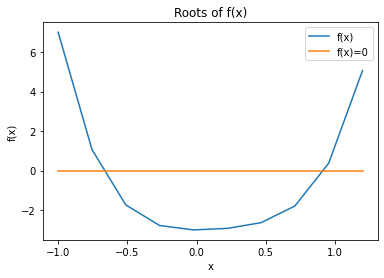

In [136]:
x=np.linspace(-1,1.2,10)
plt.plot(x,f(x),label="f(x)")
plt.plot(x,x*0,label="f(x)=0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Roots of f(x)")
plt.legend()
plt.show()

(d) Use scipy.optimize.fsolve to find the all roots. Make sure to print all roots. [2 pts]

In [137]:
r1=so.fsolve(f,1)
r2=so.fsolve(f,-1)

print("The root",r1, "plugged into the function returns the value" , f(r1))
print("The root",r2, "plugged into the function returns the value" , f(r2))

The root [0.925223] plugged into the function returns the value [-8.8817842e-16]
The root [-0.68473345] plugged into the function returns the value [1.5720758e-13]


Question 3. Edge detection of an image.

(a) Read in and display the image piano.jpg using matplotlib.pyplot's functions. Make sure to turn the axis off and have a title for the image. [4 pts]

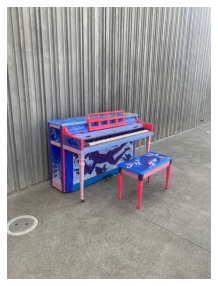

In [138]:
figarray=plt.imread('piano.jpg')
plt.figure(figsize=(5,5))
plt.imshow(figarray)
plt.axis('off')
plt.show()

(b) Use the common formula used by image processors that picks up 29.9% red, 58.7% green, and 11.4% blue to convert the image to black and white. Display this new black and white image using the binary colormap scheme. Again, make sure to turn the axis off and have a title for the image. [5 pts]

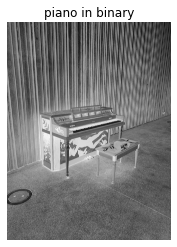

In [139]:
figBW=figarray[:,:,0]*0.299 + figarray[:,:,1]*0.587 + figarray[:,:,2]*0.114
plt.imshow(figBW,cmap='binary')
plt.title('piano in binary')
plt.axis("off")
plt.show()

(c) Use the Sobel operators to pick up horizontal and vertical features, and combine the two to detect all of the edges. Make sure to change the minimum and maximum of the colorbar ranges to see the edges clearly. Display the three images: one with horizontal features, one with vertical features, and one with all of the edges using plt.subplot all in one single row. Display the three using the binary colormap scheme. Again, make sure to turn the axis off and have a descriptive title for each image. [22 pts]

In [140]:
# horizontal Sobel operator Gx and vertical Sobel operator Gy
gx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
gy = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

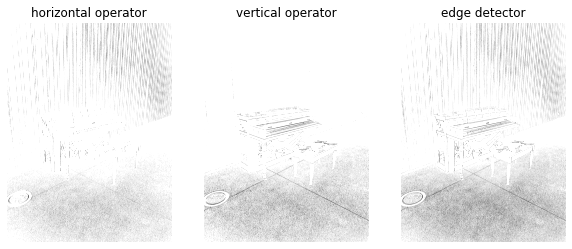

In [141]:
gx_im=scipy.ndimage.convolve(figBW,gx)
gy_im=scipy.ndimage.convolve(figBW,gy)
edge_im=np.sqrt(gx_im**2+gy_im**2)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(abs(gx_im),cmap='binary',vmin=0.05*gx_im.max(),vmax=0.5*gx_im.max())
plt.title('horizontal operator')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(abs(gy_im),cmap='binary',vmin=0.05*gy_im.max(),vmax=0.5*gy_im.max())
plt.title('vertical operator')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(edge_im,cmap='binary',vmin=0.05*edge_im.max(),vmax=0.5*edge_im.max())
plt.title('edge detector')
plt.axis('off')
plt.show()

(d) Which Sobel operator (horizontal or vertical) gives vertical edges? Why? [2 pts]

Horizontal gives more edges because when running through the array it runs into more edges.

Question 4. Numerical differentiation using central difference.

(a) Create a function that returns the first derivative value $f'(a)$ using central difference. The inputs need to be function $f$, point or vector/array $a$ where the derivative will be computed, and spacing $h$ between adjacent points. [5 pts]

In [142]:
def func_deriv(f,a,h):
    
    f_front=f(a+h)
    f_back=f(a-h)
    
    dfdx=(f_front-f_back)/(2*h)
    
    return dfdx

(b) Define the function $f(x)=e^{−x^2/10}\cos(x)$ in python. Exponents can be described using np.exp. [1 pt]

In [143]:
func=lambda x: np.exp((-x**2)/10)

(c) Plot $f(x)$ along with its first derivative $f'(x)$ using the function you created from part (a). $x$ should range from 0 to 2$\pi$. $f(x)$ and $f'(x)$ should be plotted with different colors and markers. Include a label for the $x$-axis, a label for the $y$-axis, a title for the plot, and a legend for $f(x)$ and $f'(x)$. Set $h=0.01$. [12 pts]

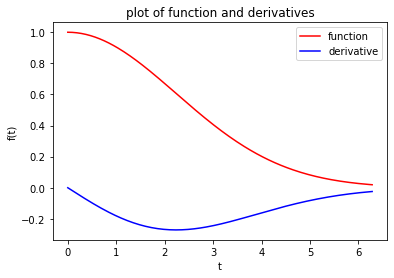

In [144]:
a=np.arange(0,2*np.pi+np.pi/100,np.pi/100)
func_deriv(func,a,0.01)
plt.plot(a,func(a),'r')
plt.plot(a,func_deriv(func,a,0.01),'b')
plt.legend(['function','derivative'])
plt.title('plot of function and derivatives')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

Rough work/test cells (won't be graded or looked at):